In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from abc import abstractmethod
import scipy as sc
from ydata_profiling import ProfileReport
from scipy import stats as sts
import sklearn 
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, fbeta_score, precision_recall_curve, average_precision_score, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import phik
from typing import Literal
from sklearn.compose import ColumnTransformer
import umap
from catboost import CatBoostClassifier
import optuna
from sklearn.pipeline import Pipeline

pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [3]:
df = pd.read_csv('data/star_classification.csv')
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [4]:
df = df.drop(columns='obj_ID')

In [5]:
df

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [6]:
df = df.iloc[range(1000)]

In [7]:
df['rerun_ID'].unique()

array([301])

In [8]:
df = df.drop(columns='rerun_ID')

In [9]:
df.describe()

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,188.196554,21.586807,22.351454,20.853220,19.792843,19.158799,18.805202,4991.107000,3.40800,176.386000,6.017714e+18,0.575877,5344.695000,55732.153000,443.299000
std,111.212541,16.961510,2.181603,1.974278,1.838924,1.712725,1.739727,2154.765041,1.26931,122.338308,3.242804e+18,0.668282,2880.176758,1741.589877,269.861529
min,0.024258,-8.299666,15.698960,14.301950,13.457930,13.036150,12.397260,1140.000000,1.00000,11.000000,3.671157e+17,-0.003844,326.000000,51692.000000,3.000000
25%,127.897674,7.496291,20.714630,19.399168,18.375160,17.902762,17.586025,3606.000000,2.00000,87.000000,3.660086e+18,0.096839,3250.750000,54882.000000,212.750000
50%,179.794305,20.339265,22.487220,21.401505,20.274695,19.488050,19.047115,4263.000000,4.00000,147.000000,5.683601e+18,0.466113,5048.000000,55945.500000,412.500000
75%,254.658698,32.162116,23.997467,22.297863,21.082223,20.403685,19.851915,7717.000000,4.00000,232.000000,8.527976e+18,0.694190,7574.250000,56944.000000,643.000000
max,359.946316,68.121576,27.368430,25.681880,24.802600,23.178280,23.990340,8157.000000,6.00000,819.000000,1.412684e+19,5.922225,12547.000000,58932.000000,1000.000000


In [10]:
df.isna().sum()

alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [11]:
df.dtypes

alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [12]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [ ]:
# profile = ProfileReport(df)
# profile.to_file('stellar_report.html')

In [14]:
df[df['z'] == -9999]

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID


In [15]:
df[df['u'] == -9999]

,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID


In [17]:
ord = OrdinalEncoder()

df[['class']] = ord.fit_transform(df[['class']])

In [18]:
X = df.drop(columns='class')
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [19]:
def create_pipeline_xgboost(xgb_params):
    
    pipeline = Pipeline([
        ('power_transform', PowerTransoformer()),
        ('model', OneVsRestClassifier(XGBClassifier()))
    ])
    
    return pipeline 

[I 2025-02-26 18:00:04,794] A new study created in memory with name: no-name-c2cde52a-bb3c-45a6-8522-7858bce7e3cd
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


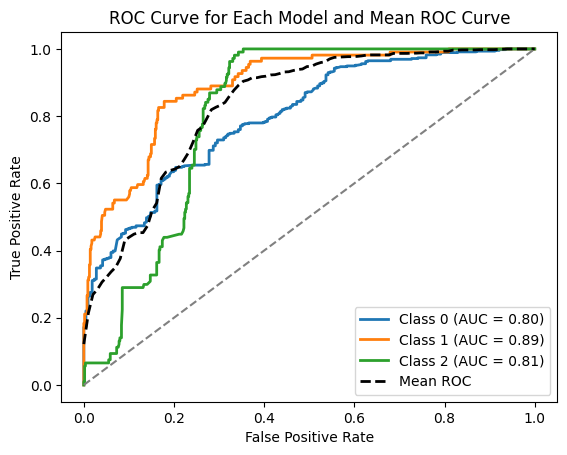

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:00:08,361] Trial 0 finished with value: 0.8426065934845366 and parameters: {'model': 'RandomForest', 'criterion': 'gini', 'max_depth': 28, 'min_samples_split': 4, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.385297820048043, 'max_features': 'sqrt', 'max_leaf_nodes': 154, 'n_estimators': 424, 'bootstrap': False}. Best is trial 0 with value: 0.8426065934845366.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overf

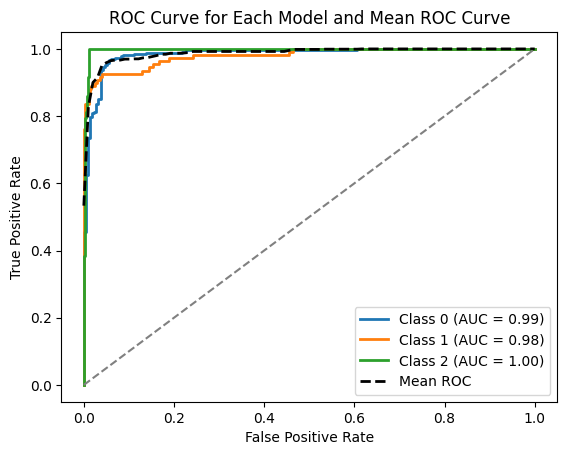

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:00:09,864] Trial 1 finished with value: 0.9876629438484698 and parameters: {'model': 'xgb', 'learning_rate': 0.2716893397944015, 'max_depth': 7, 'reg_alpha': 1.200842304786668, 'reg_lambda': 0.7817182414272232}. Best is trial 1 with value: 0.9876629438484698.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-

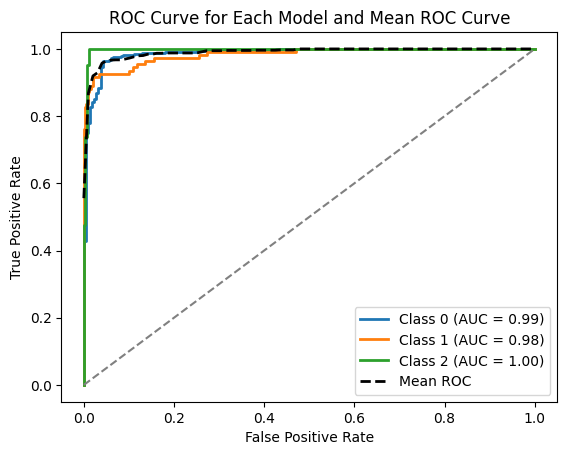

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:00:11,646] Trial 2 finished with value: 0.9896817160868713 and parameters: {'model': 'xgb', 'learning_rate': 0.22015012514199123, 'max_depth': 6, 'reg_alpha': 0.42891732368358915, 'reg_lambda': 0.792553673483594}. Best is trial 2 with value: 0.9896817160868713.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/sit

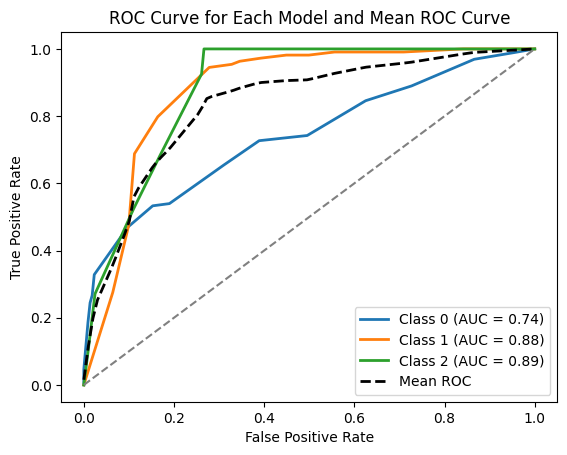

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:00:25,239] Trial 3 finished with value: 0.831790484761313 and parameters: {'model': 'RandomForest', 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 16, 'min_weight_fraction_leaf': 0.38277424808275895, 'max_features': None, 'max_leaf_nodes': 154, 'n_estimators': 943, 'bootstrap': False}. Best is trial 2 with value: 0.9896817160868713.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: ov

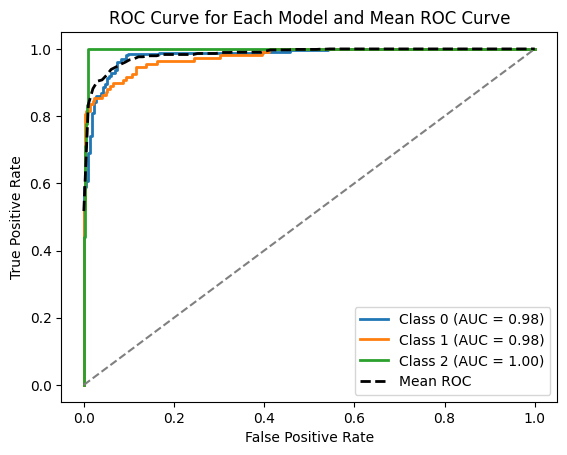

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:00:40,540] Trial 4 finished with value: 0.9859606885037032 and parameters: {'model': 'RandomForest', 'criterion': 'log_loss', 'max_depth': 21, 'min_samples_split': 12, 'min_samples_leaf': 9, 'min_weight_fraction_leaf': 0.06493175472359987, 'max_features': None, 'max_leaf_nodes': 131, 'n_estimators': 658, 'bootstrap': True}. Best is trial 2 with value: 0.9896817160868713.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: o

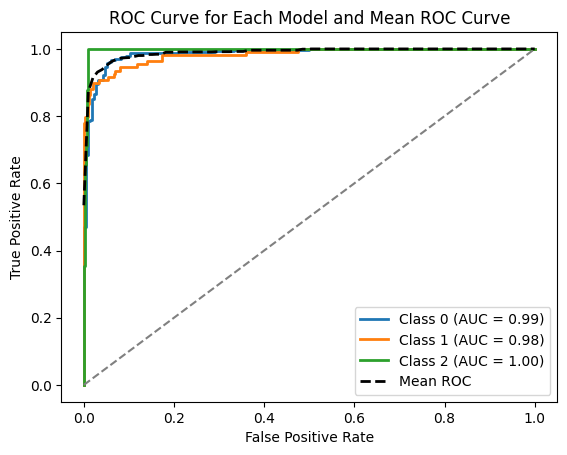

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:00:57,198] Trial 5 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 2 with value: 0.9896817160868713.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=

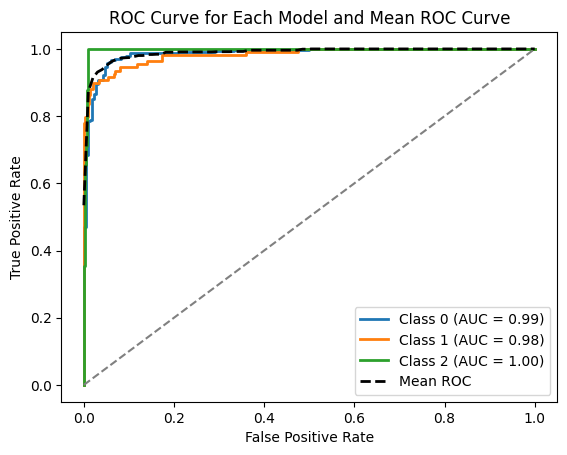

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:01:14,762] Trial 6 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 2 with value: 0.9896817160868713.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=

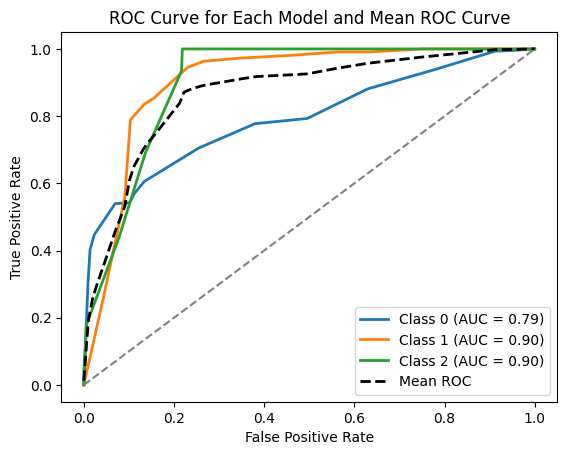

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:01:21,512] Trial 7 finished with value: 0.8644330151378073 and parameters: {'model': 'RandomForest', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.34661717557030125, 'max_features': None, 'max_leaf_nodes': 182, 'n_estimators': 450, 'bootstrap': False}. Best is trial 2 with value: 0.9896817160868713.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: o

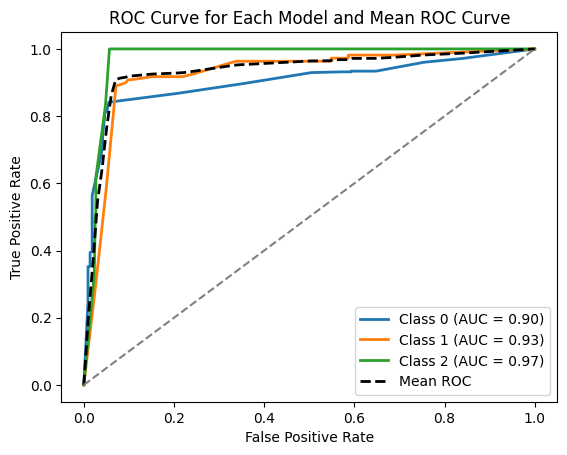

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:01:38,426] Trial 8 finished with value: 0.9362341961858935 and parameters: {'model': 'RandomForest', 'criterion': 'log_loss', 'max_depth': 14, 'min_samples_split': 13, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.20147490042450006, 'max_features': None, 'max_leaf_nodes': 123, 'n_estimators': 756, 'bootstrap': False}. Best is trial 2 with value: 0.9896817160868713.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning:

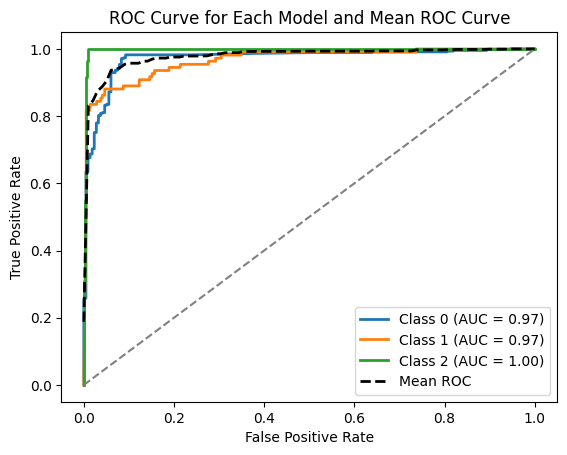

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:01:39,463] Trial 9 finished with value: 0.9817021302814473 and parameters: {'model': 'RandomForest', 'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 8, 'min_weight_fraction_leaf': 0.14581213121623157, 'max_features': None, 'max_leaf_nodes': 198, 'n_estimators': 46, 'bootstrap': True}. Best is trial 2 with value: 0.9896817160868713.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow

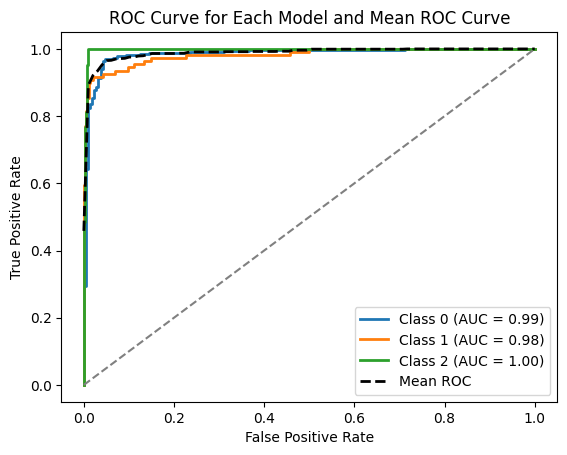

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:01:41,549] Trial 10 finished with value: 0.9888332318862458 and parameters: {'model': 'xgb', 'learning_rate': 0.13818142361443753, 'max_depth': 2, 'reg_alpha': 0.39903946626704645, 'reg_lambda': 0.9711759128142982}. Best is trial 2 with value: 0.9896817160868713.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/s

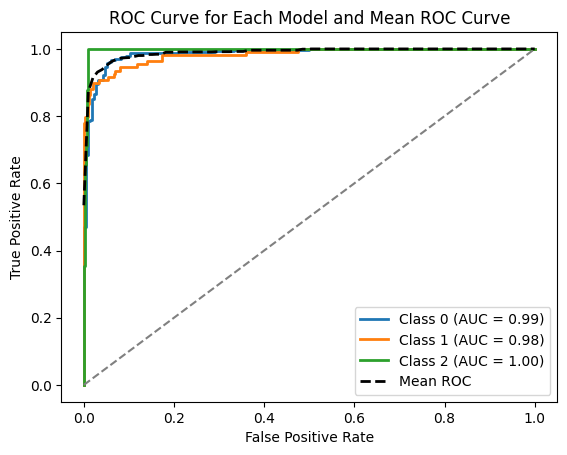

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:02:00,973] Trial 11 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 2 with value: 0.9896817160868713.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

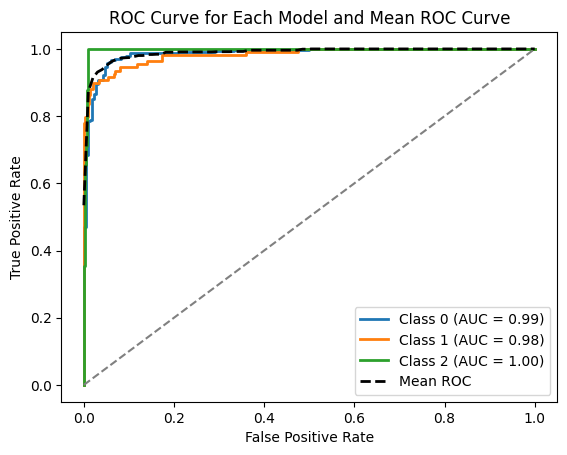

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:02:21,342] Trial 12 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 2 with value: 0.9896817160868713.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

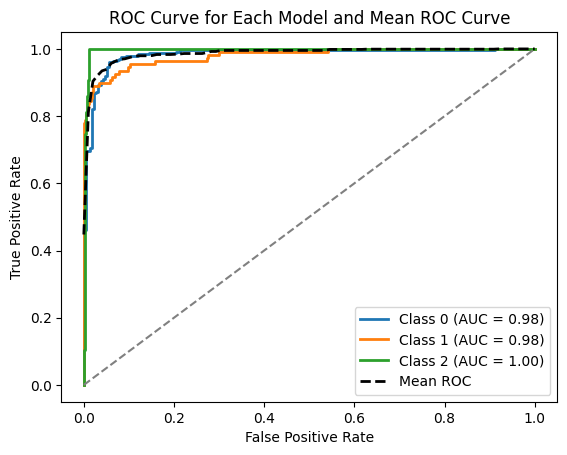

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:02:23,167] Trial 13 finished with value: 0.9867205949024654 and parameters: {'model': 'xgb', 'learning_rate': 0.2643300657565277, 'max_depth': 5, 'reg_alpha': 3.971115372035584, 'reg_lambda': 0.1557861317481034}. Best is trial 2 with value: 0.9896817160868713.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site

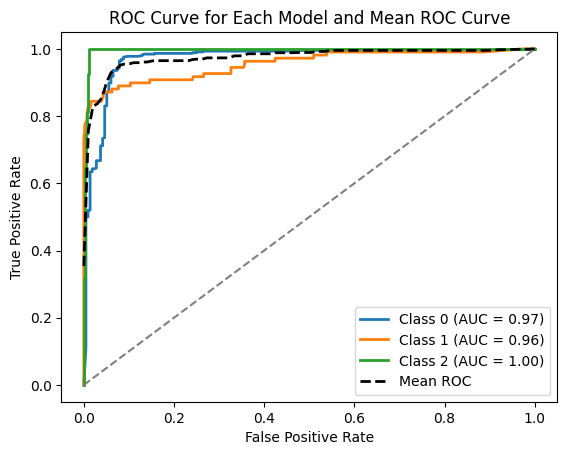

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:02:27,289] Trial 14 finished with value: 0.9742710510877509 and parameters: {'model': 'xgb', 'learning_rate': 0.005410444902661737, 'max_depth': 5, 'reg_alpha': 2.4330089279100333, 'reg_lambda': 0.5639249808267571}. Best is trial 2 with value: 0.9896817160868713.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/s

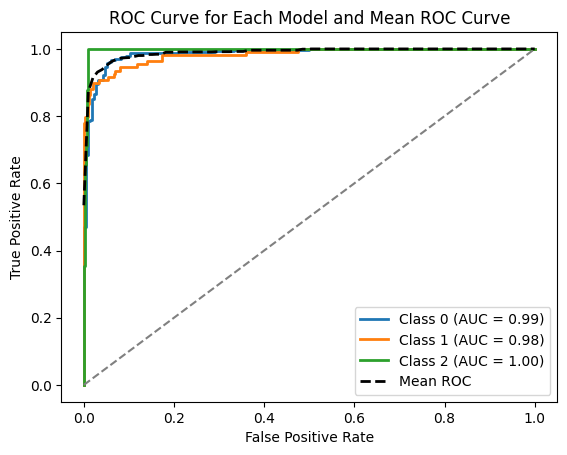

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:02:47,048] Trial 15 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 2 with value: 0.9896817160868713.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

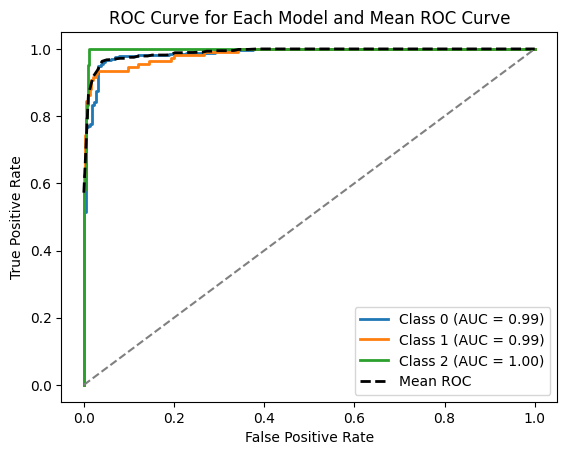

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:02:48,838] Trial 16 finished with value: 0.9897798870155055 and parameters: {'model': 'xgb', 'learning_rate': 0.16108806159889233, 'max_depth': 1, 'reg_alpha': 0.16842209871192337, 'reg_lambda': 0.47303285528498856}. Best is trial 16 with value: 0.9897798870155055.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10

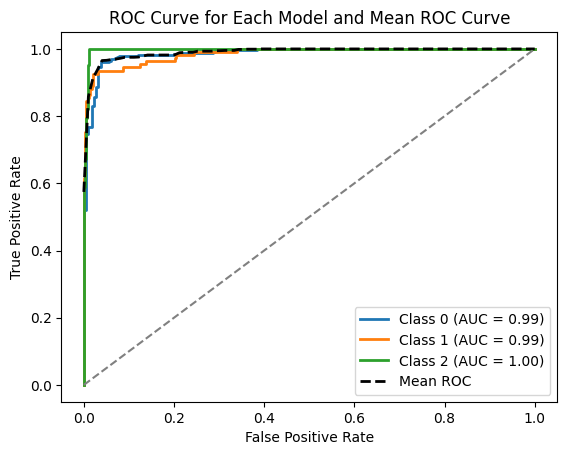

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:02:50,599] Trial 17 finished with value: 0.9899789455415857 and parameters: {'model': 'xgb', 'learning_rate': 0.16520910354038926, 'max_depth': 1, 'reg_alpha': 0.40673747296722573, 'reg_lambda': 0.40710900647041787}. Best is trial 17 with value: 0.9899789455415857.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10

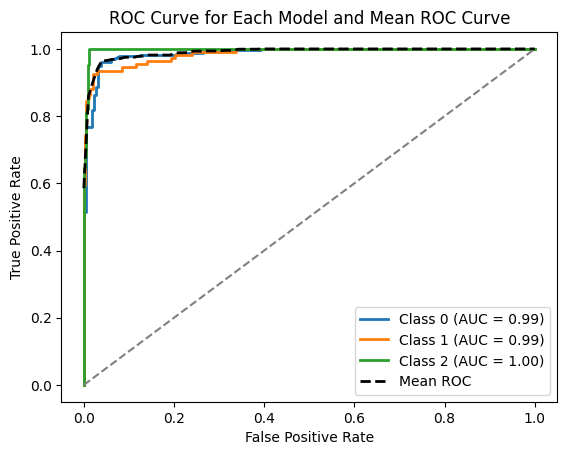

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:02:52,408] Trial 18 finished with value: 0.9900556535001307 and parameters: {'model': 'xgb', 'learning_rate': 0.1415396068901938, 'max_depth': 1, 'reg_alpha': 0.3481218104969955, 'reg_lambda': 0.3251790517772124}. Best is trial 18 with value: 0.9900556535001307.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/si

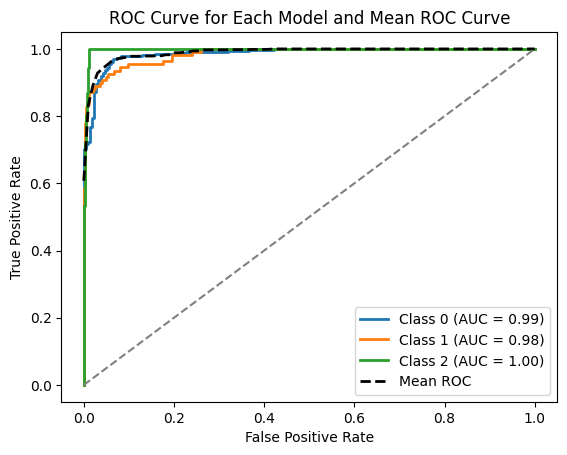

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:02:54,187] Trial 19 finished with value: 0.9895721117763268 and parameters: {'model': 'xgb', 'learning_rate': 0.1173933215617156, 'max_depth': 1, 'reg_alpha': 1.5965458761060334, 'reg_lambda': 0.30840963589662485}. Best is trial 18 with value: 0.9900556535001307.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/s

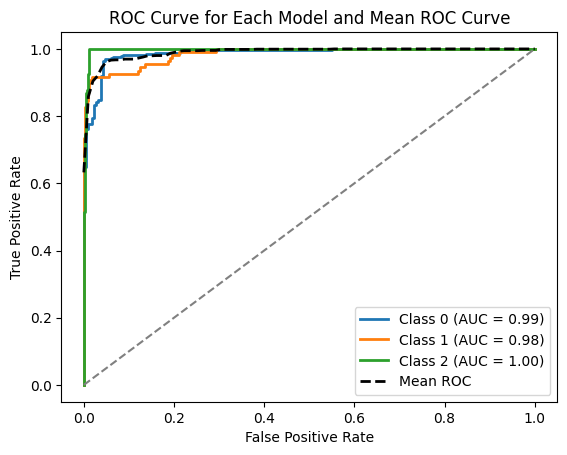

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:02:56,499] Trial 20 finished with value: 0.9899552698841564 and parameters: {'model': 'xgb', 'learning_rate': 0.07358740516872138, 'max_depth': 3, 'reg_alpha': 1.1873353362048857, 'reg_lambda': 0.016749158613056758}. Best is trial 18 with value: 0.9900556535001307.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10

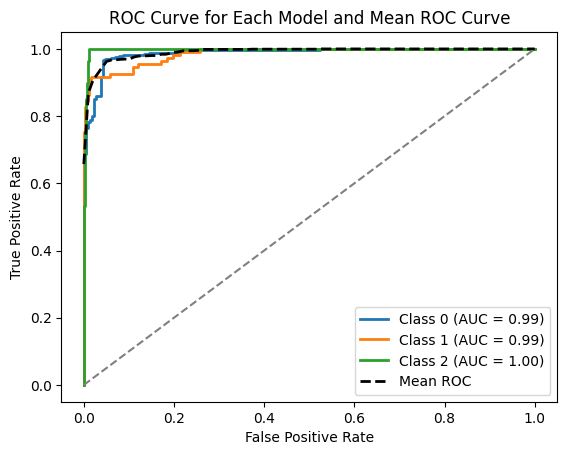

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:02:58,818] Trial 21 finished with value: 0.9907319247368349 and parameters: {'model': 'xgb', 'learning_rate': 0.08306719454903802, 'max_depth': 3, 'reg_alpha': 1.042004921295546, 'reg_lambda': 0.013351400895395087}. Best is trial 21 with value: 0.9907319247368349.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/

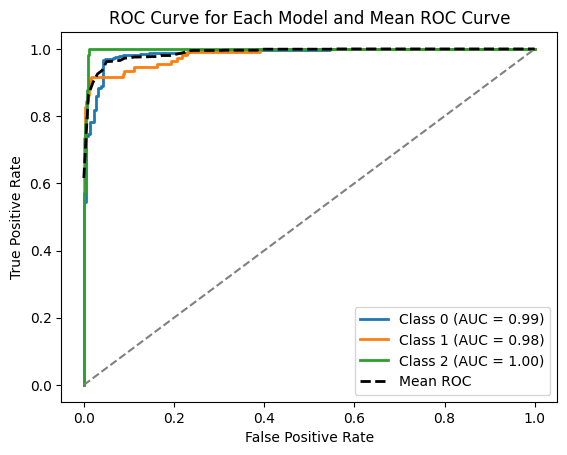

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:03:01,549] Trial 22 finished with value: 0.9893441084501534 and parameters: {'model': 'xgb', 'learning_rate': 0.07869456006318137, 'max_depth': 3, 'reg_alpha': 0.7591213218626328, 'reg_lambda': 0.3157802639178115}. Best is trial 21 with value: 0.9907319247368349.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/s

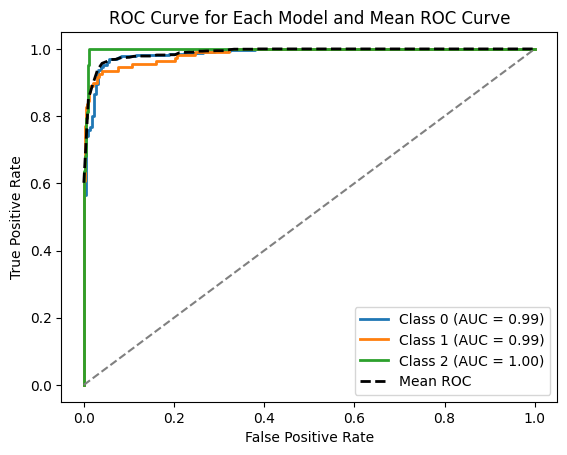

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:03:03,288] Trial 23 finished with value: 0.9899819106428019 and parameters: {'model': 'xgb', 'learning_rate': 0.17978188251266225, 'max_depth': 1, 'reg_alpha': 0.9378259986411202, 'reg_lambda': 0.39339452187893287}. Best is trial 21 with value: 0.9907319247368349.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/

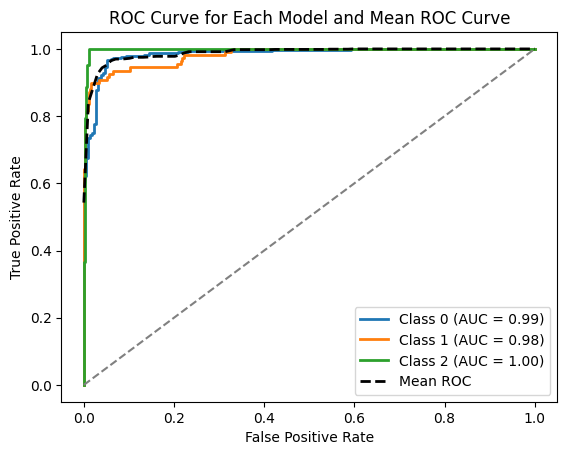

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:03:05,185] Trial 24 finished with value: 0.9886249326023823 and parameters: {'model': 'xgb', 'learning_rate': 0.20070843633448632, 'max_depth': 2, 'reg_alpha': 1.9333417822863201, 'reg_lambda': 0.07751289948733878}. Best is trial 21 with value: 0.9907319247368349.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/

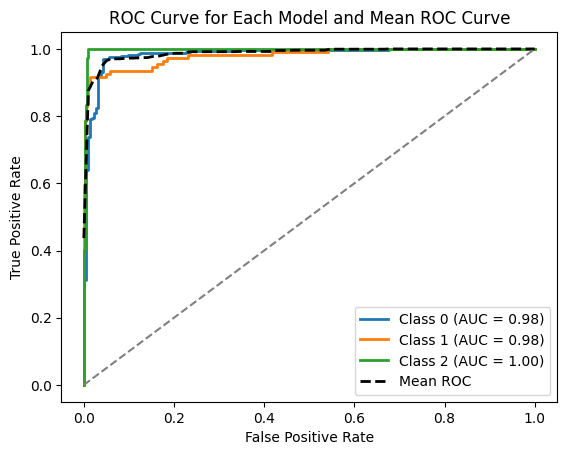

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:03:07,634] Trial 25 finished with value: 0.9881104847765907 and parameters: {'model': 'xgb', 'learning_rate': 0.09007786171042974, 'max_depth': 2, 'reg_alpha': 1.0156757349607737, 'reg_lambda': 0.227877858446651}. Best is trial 21 with value: 0.9907319247368349.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/si

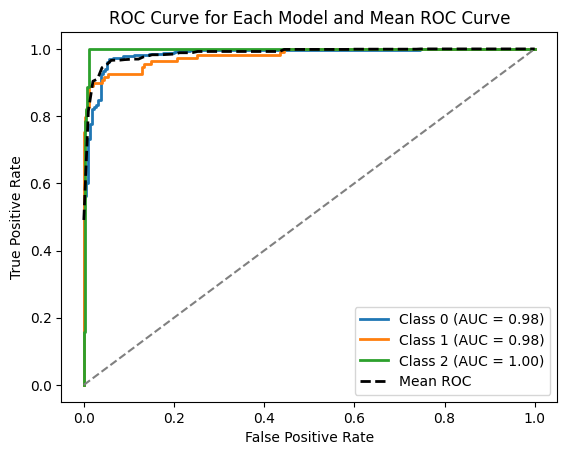

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:03:11,708] Trial 26 finished with value: 0.9870868584564182 and parameters: {'model': 'xgb', 'learning_rate': 0.03115421352449016, 'max_depth': 4, 'reg_alpha': 2.479191943657031, 'reg_lambda': 0.5891740280602381}. Best is trial 21 with value: 0.9907319247368349.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/si

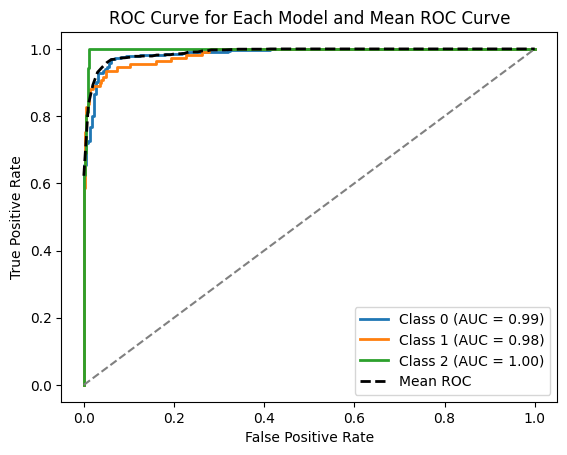

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:03:13,683] Trial 27 finished with value: 0.989671207671357 and parameters: {'model': 'xgb', 'learning_rate': 0.20315720647936417, 'max_depth': 1, 'reg_alpha': 1.5718619369692757, 'reg_lambda': 0.37089533854958895}. Best is trial 21 with value: 0.9907319247368349.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/s

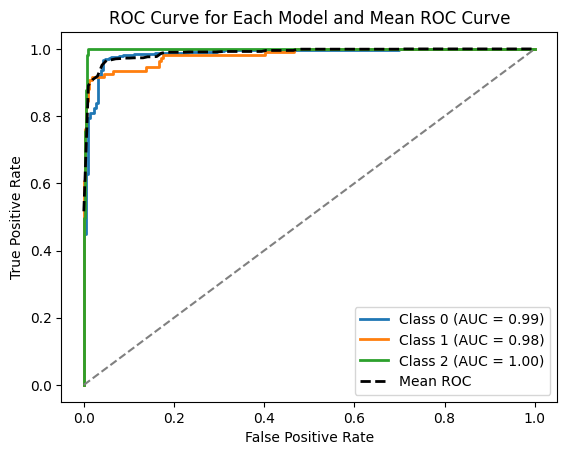

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:03:16,082] Trial 28 finished with value: 0.9886645819204803 and parameters: {'model': 'xgb', 'learning_rate': 0.11711549660569191, 'max_depth': 2, 'reg_alpha': 0.6120344626120355, 'reg_lambda': 0.22373231302818347}. Best is trial 21 with value: 0.9907319247368349.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/

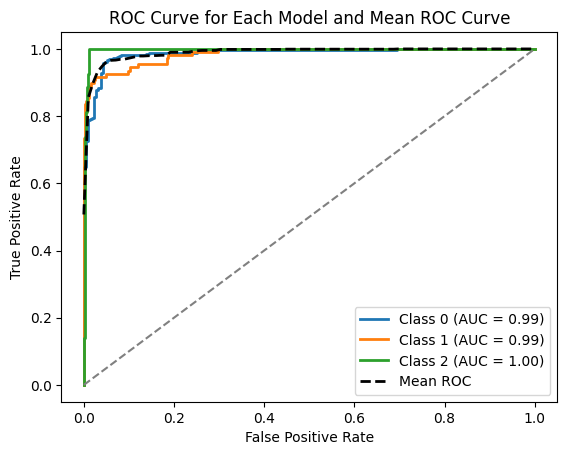

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 18:03:18,219] Trial 29 finished with value: 0.98962802904021 and parameters: {'model': 'xgb', 'learning_rate': 0.1802884795660674, 'max_depth': 4, 'reg_alpha': 0.8569598772466605, 'reg_lambda': 0.13548860434858576}. Best is trial 21 with value: 0.9907319247368349.


Best pipeline: {'model': 'xgb', 'learning_rate': 0.08306719454903802, 'max_depth': 3, 'reg_alpha': 1.042004921295546, 'reg_lambda': 0.013351400895395087}


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import optuna

def objective(trial):

    scaler = PowerTransformer()
        
    model = trial.suggest_categorical('model', ['xgb', 'catboost', 'RandomForest'])
    
    if model == 'xgb':
        model = OneVsRestClassifier(XGBClassifier(
            n_estimators = 300,
            learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3),
            max_depth = trial.suggest_int('max_depth', 1, 10),
            reg_alpha = trial.suggest_float('reg_alpha', 0.1, 4),
            reg_lambda = trial.suggest_float('reg_lambda', 0.01, 1)
        ))
        
    elif model == 'catboost':
        model = OneVsRestClassifier(CatBoostClassifier(verbose=0))
    else:
        model = OneVsRestClassifier(RandomForestClassifier(
            criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
            max_depth = trial.suggest_int('max_depth', 1, 30),
            min_samples_split = trial.suggest_int('min_samples_split', 2, 15),
            min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20),
            min_weight_fraction_leaf = trial.suggest_float('min_weight_fraction_leaf', 0.00001, 0.5),
            max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
            max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 3, 200),
            n_estimators = trial.suggest_int('n_estimators', 2, 1000),
            bootstrap = trial.suggest_categorical('bootstrap', [True, False])
        ))
        
    pipeline = Pipeline([
        ("scaler", scaler),
        ("model", model)
    ])
    
    # Получаем предсказания для каждой модели через кросс-валидацию
    y_pred_prob = cross_val_predict(pipeline, X_train, y_train, cv=3, method='predict_proba')

    # Рисуем ROC-кривую для каждой модели
    n_classes = y_train.nunique()  # Получаем количество классов
    fpr_dict = {}
    tpr_dict = {}
    roc_auc_dict = {}
    
    for i in range(n_classes):
        # Вычисляем fpr и tpr для каждого класса
        fpr, tpr, _ = roc_curve(y_train == i, y_pred_prob[:, i])  # Для бинарной классификации
        roc_auc = auc(fpr, tpr)
        
        # Сохраняем ROC-значения для каждой модели
        fpr_dict[i] = fpr
        tpr_dict[i] = tpr
        roc_auc_dict[i] = roc_auc
        
        # Рисуем ROC-кривую для каждого класса
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')
    
    # Усредненная ROC-кривая
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.zeros_like(mean_fpr)
    
    for i in range(n_classes):
        mean_tpr += np.interp(mean_fpr, fpr_dict[i], tpr_dict[i])
    
    mean_tpr /= n_classes
    
    # Рисуем усредненную ROC-кривую
    plt.plot(mean_fpr, mean_tpr, color='black', linestyle='--', lw=2, label='Mean ROC')

    # Добавляем диагональ (случайная классификация)
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

    # Добавляем заголовки и подписи
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Model and Mean ROC Curve')
    plt.legend(loc='lower right')

    # Показать график
    plt.show()

    # Оценка модели с использованием ROC AUC
    score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="roc_auc_ovr").mean()
    return score

# Создание и оптимизация исследования
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# Лучший результат
print("Best pipeline:", study.best_params)


[I 2025-02-26 19:00:44,274] A new study created in memory with name: no-name-2810597a-6827-415b-8d3b-4cb97e812f7c
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


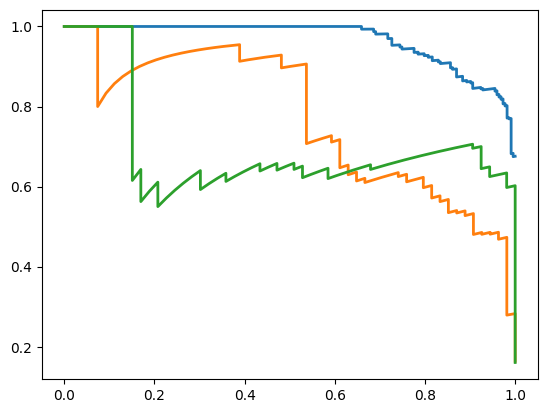

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:00:50,980] Trial 0 finished with value: 0.9300259954199119 and parameters: {'model': 'RandomForest', 'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.2223664641405979, 'max_features': 'sqrt', 'max_leaf_nodes': 181, 'n_estimators': 699, 'bootstrap': False}. Best is trial 0 with value: 0.9300259954199119.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: o

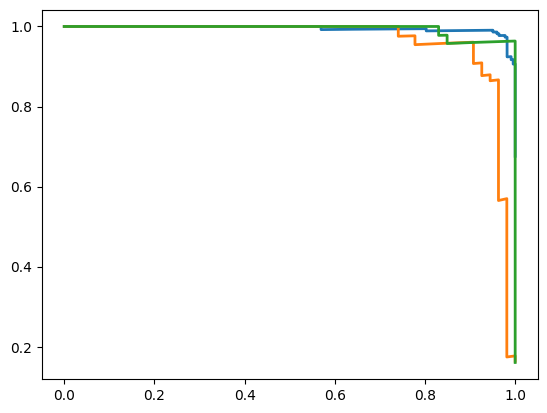

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:01:07,715] Trial 1 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=

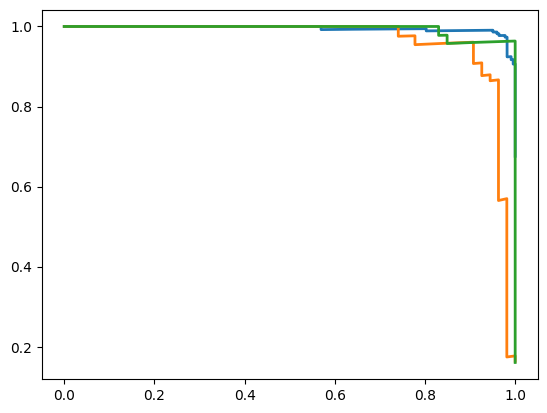

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:01:25,202] Trial 2 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=

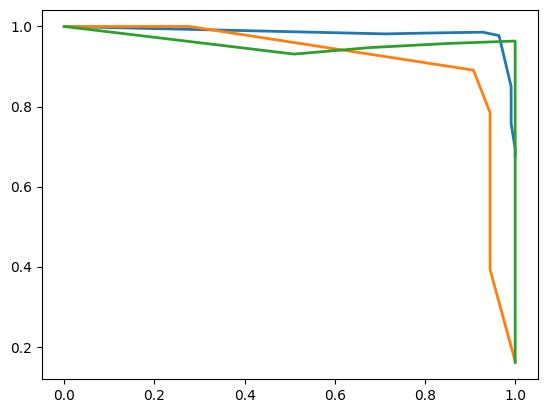

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:01:36,276] Trial 3 finished with value: 0.9667729515634251 and parameters: {'model': 'RandomForest', 'criterion': 'log_loss', 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 17, 'min_weight_fraction_leaf': 0.15977379063543853, 'max_features': None, 'max_leaf_nodes': 127, 'n_estimators': 567, 'bootstrap': False}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: 

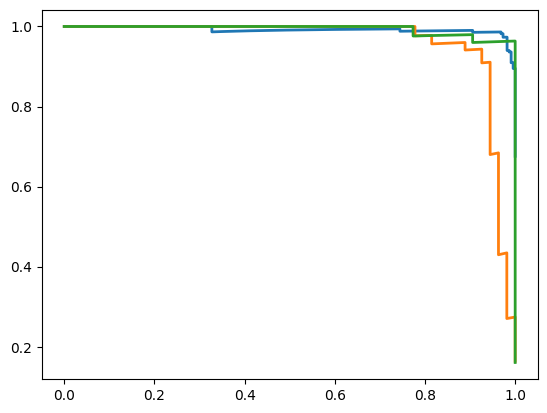

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:01:37,542] Trial 4 finished with value: 0.989040877314859 and parameters: {'model': 'xgb', 'learning_rate': 0.20251885888280896, 'max_depth': 8, 'reg_alpha': 0.11024396273905737, 'reg_lambda': 0.33549326116296524}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/si

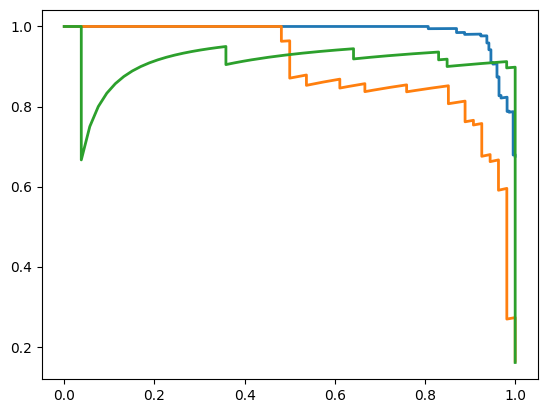

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:01:38,229] Trial 5 finished with value: 0.9654476653214673 and parameters: {'model': 'RandomForest', 'criterion': 'log_loss', 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 16, 'min_weight_fraction_leaf': 0.17224326808287738, 'max_features': 'sqrt', 'max_leaf_nodes': 118, 'n_estimators': 51, 'bootstrap': False}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning:

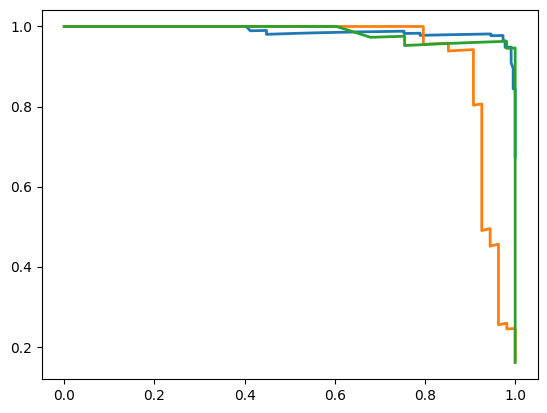

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:01:39,537] Trial 6 finished with value: 0.9854443355193468 and parameters: {'model': 'xgb', 'learning_rate': 0.08337478360554673, 'max_depth': 10, 'reg_alpha': 3.3683197729855037, 'reg_lambda': 0.40227958985478296}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/s

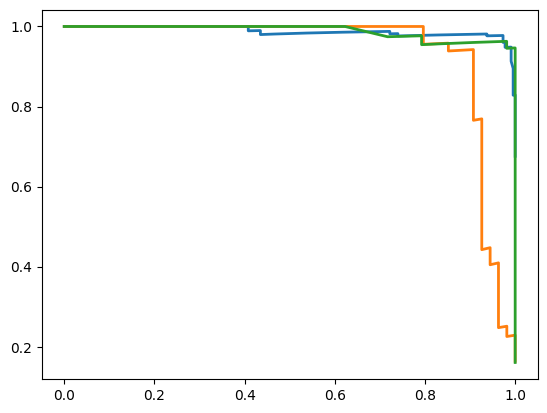

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:01:41,454] Trial 7 finished with value: 0.9860586560909398 and parameters: {'model': 'xgb', 'learning_rate': 0.02427420011212492, 'max_depth': 5, 'reg_alpha': 3.5813138095548207, 'reg_lambda': 0.3349757082927111}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/sit

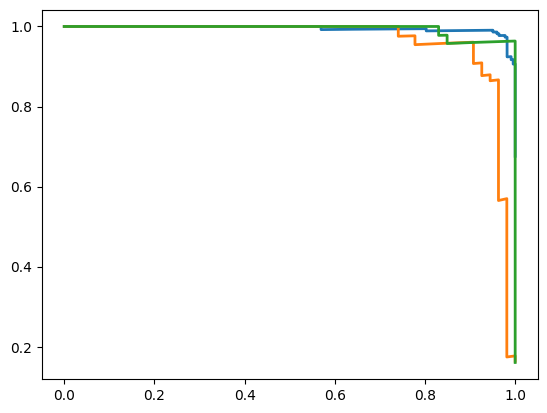

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:01:59,019] Trial 8 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=

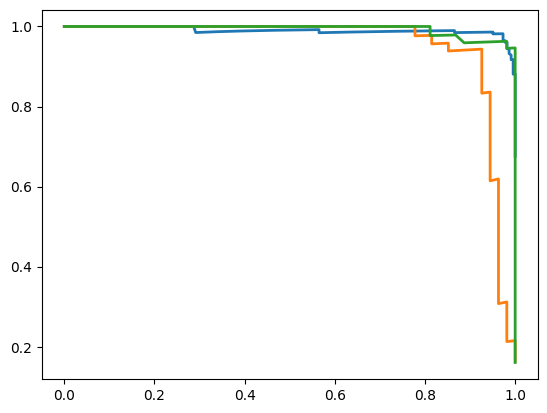

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:02:00,868] Trial 9 finished with value: 0.987465433835078 and parameters: {'model': 'xgb', 'learning_rate': 0.13767145739021194, 'max_depth': 8, 'reg_alpha': 2.153285457187134, 'reg_lambda': 0.09123958529379741}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site

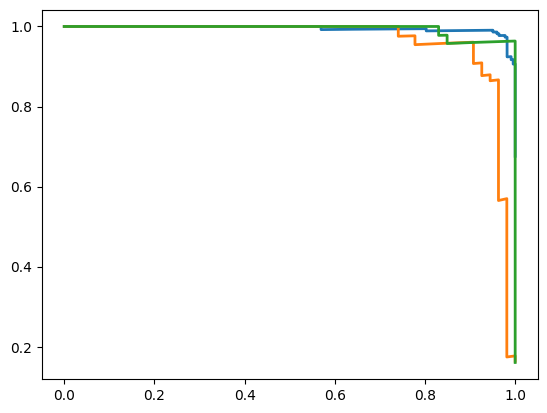

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:02:18,647] Trial 10 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

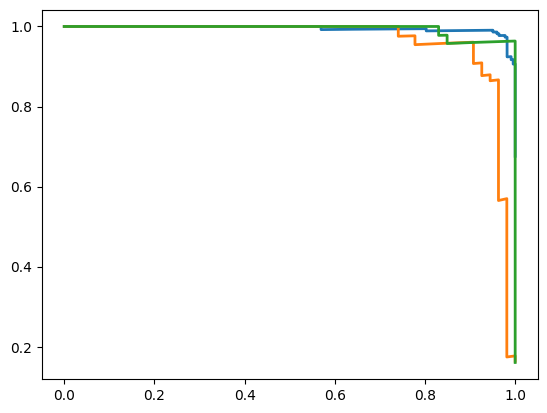

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:02:36,531] Trial 11 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

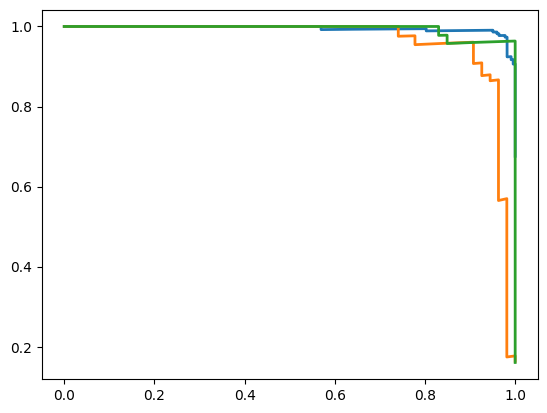

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:02:54,486] Trial 12 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

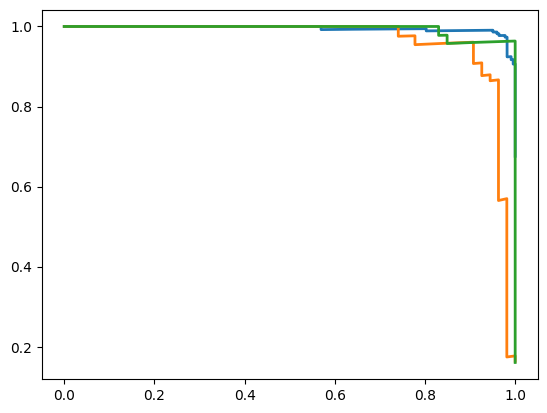

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:03:12,572] Trial 13 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

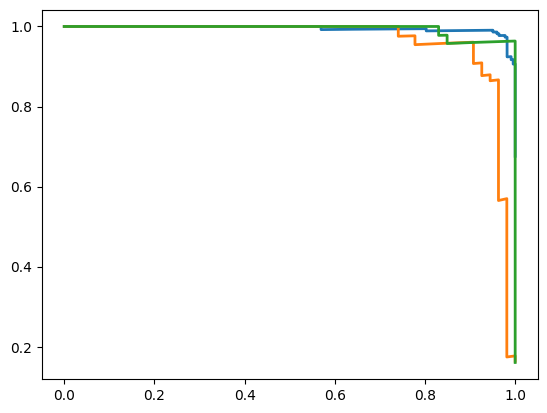

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:03:30,978] Trial 14 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

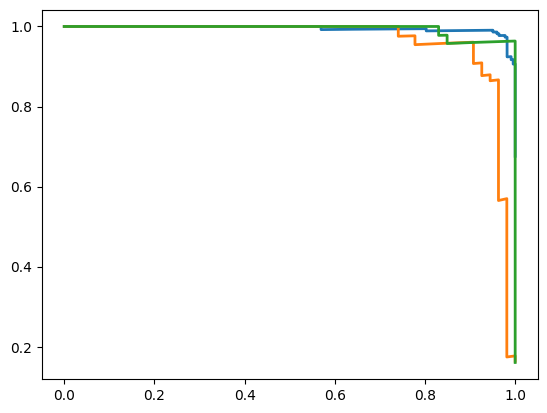

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:03:49,424] Trial 15 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

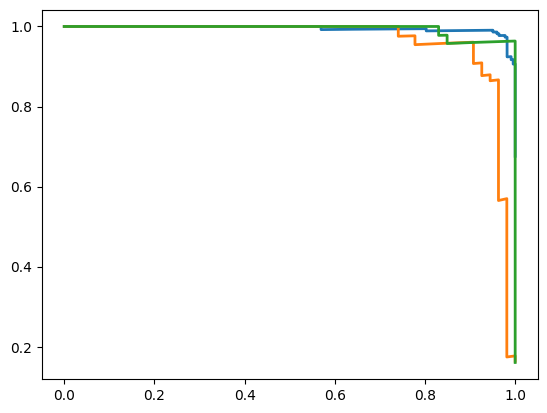

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:04:07,629] Trial 16 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

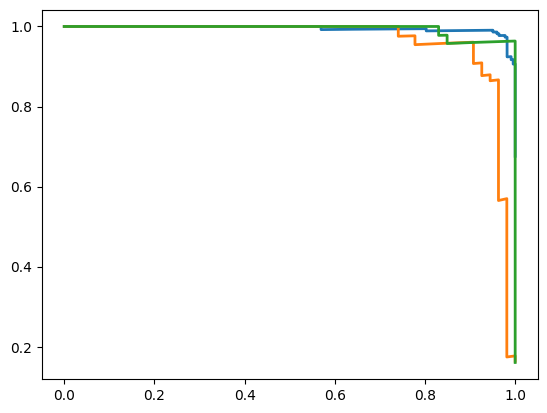

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:04:25,874] Trial 17 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

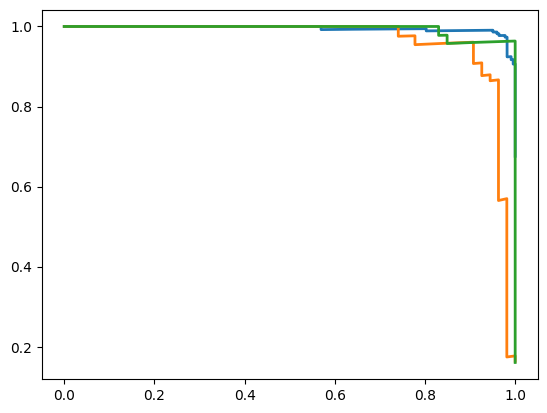

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:04:44,136] Trial 18 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

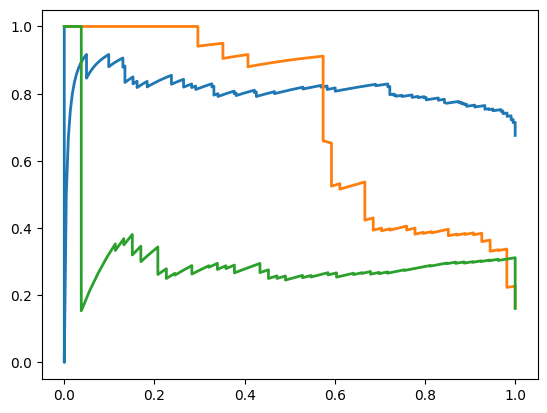

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:04:54,571] Trial 19 finished with value: 0.8004197224846435 and parameters: {'model': 'RandomForest', 'criterion': 'gini', 'max_depth': 28, 'min_samples_split': 15, 'min_samples_leaf': 4, 'min_weight_fraction_leaf': 0.4937644283324586, 'max_features': 'log2', 'max_leaf_nodes': 5, 'n_estimators': 996, 'bootstrap': True}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overf

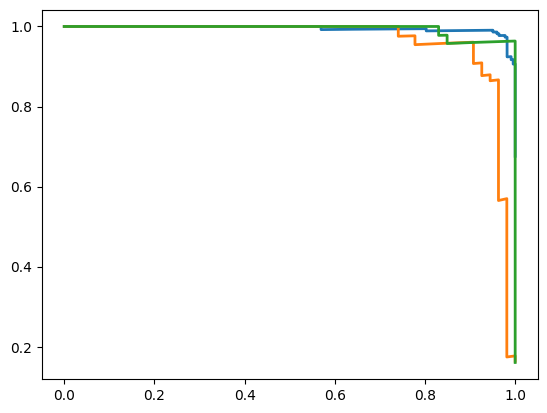

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:05:12,735] Trial 20 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

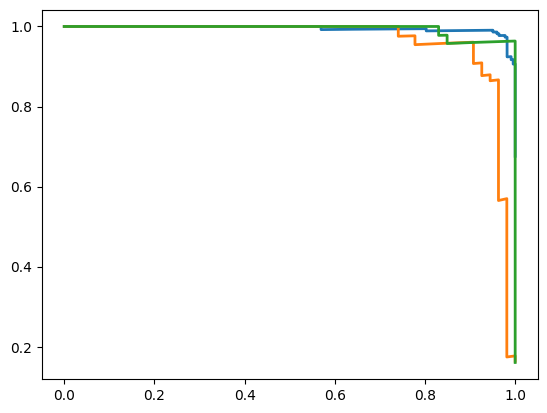

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:05:30,822] Trial 21 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

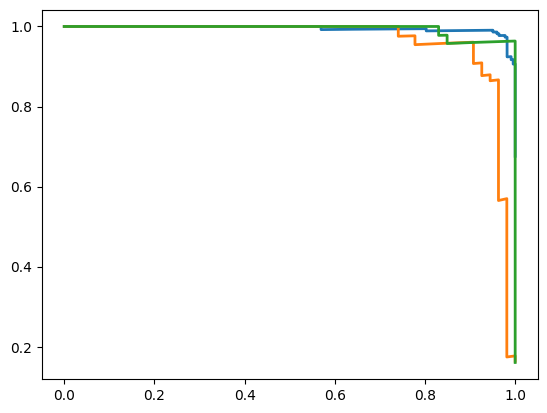

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:05:49,678] Trial 22 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

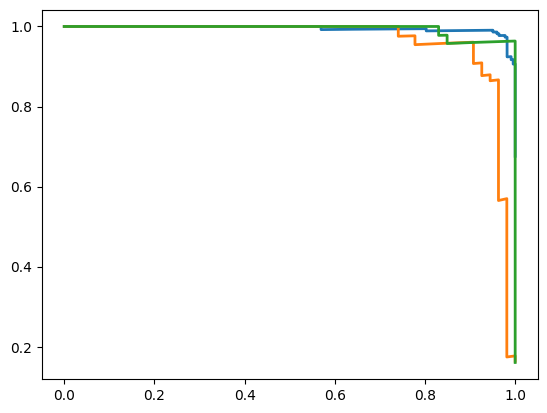

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:06:08,614] Trial 23 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

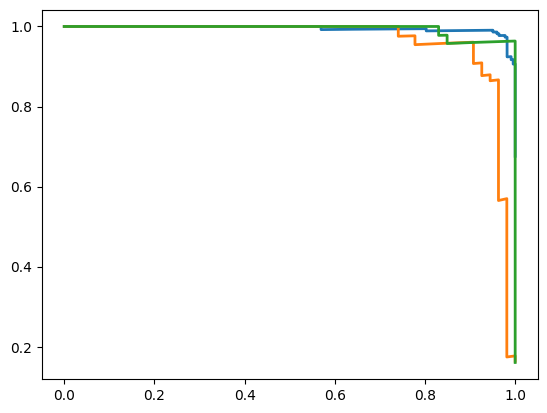

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:06:27,800] Trial 24 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

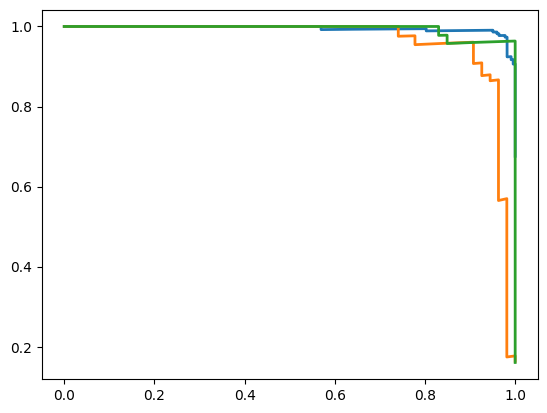

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:06:47,554] Trial 25 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

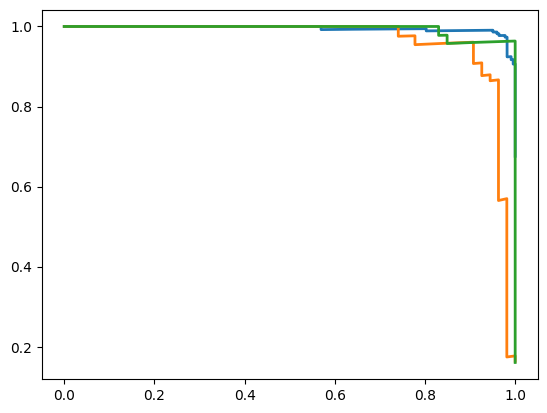

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:07:09,542] Trial 26 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

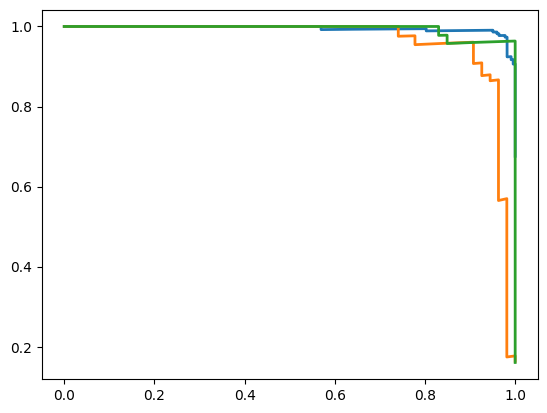

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:07:30,417] Trial 27 finished with value: 0.9892221808249014 and parameters: {'model': 'catboost'}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out

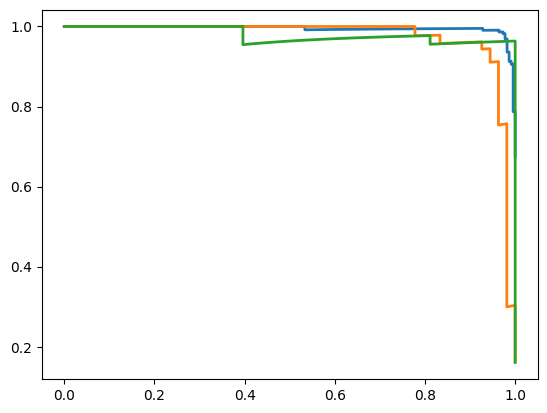

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:07:31,904] Trial 28 finished with value: 0.9890986022050234 and parameters: {'model': 'xgb', 'learning_rate': 0.2864951153474722, 'max_depth': 1, 'reg_alpha': 0.35472904489379276, 'reg_lambda': 0.9500018064493684}. Best is trial 1 with value: 0.9892221808249014.
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/si

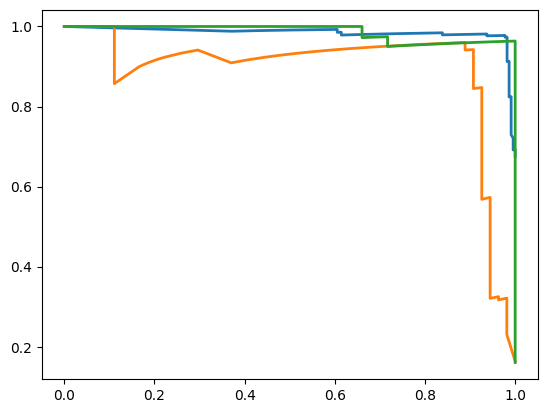

/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/envs/multiclass/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
[I 2025-02-26 19:07:32,947] Trial 29 finished with value: 0.9803786333991852 and parameters: {'model': 'RandomForest', 'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 15, 'min_samples_leaf': 10, 'min_weight_fraction_leaf': 0.0021903144390805485, 'max_features': None, 'max_leaf_nodes': 20, 'n_estimators': 32, 'bootstrap': True}. Best is trial 1 with value: 0.9892221808249014.


Best pipeline: {'model': 'catboost'}


In [90]:
def objective(trial):

    scaler = PowerTransformer()
        
    model = trial.suggest_categorical('model', ['xgb', 'catboost', 'RandomForest'])
    
    if model == 'xgb':
        model = OneVsRestClassifier(XGBClassifier(
            n_estimators = 300,
            learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3),
            max_depth = trial.suggest_int('max_depth', 1, 10),
            reg_alpha = trial.suggest_float('reg_alpha', 0.1, 4),
            reg_lambda = trial.suggest_float('reg_lambda', 0.01, 1)
        ))
        
    elif model == 'catboost':
        model = OneVsRestClassifier(CatBoostClassifier(verbose=0))
        
    else:
        model = OneVsRestClassifier(RandomForestClassifier(
            criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
            max_depth = trial.suggest_int('max_depth', 1, 30),
            min_samples_split = trial.suggest_int('min_samples_split', 2, 15),
            min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20),
            min_weight_fraction_leaf = trial.suggest_float('min_weight_fraction_leaf', 0.00001, 0.5),
            max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
            max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 3, 200),
            n_estimators = trial.suggest_int('n_estimators', 2, 1000),
            bootstrap = trial.suggest_categorical('bootstrap', [True, False])
        ))
        
    pipeline = Pipeline([
        ("scaler", scaler),
        ("model", model)
    ])
    
    # Получаем предсказания для каждой модели через кросс-валидацию
    y_pred_prob = cross_val_predict(pipeline, X_test, y_test, cv=3, method='predict_proba')

    # Рисуем ROC-кривую для каждой модели
    n_classes = y_train.nunique()  # Получаем количество классов
    pr = {}
    rc = {}
    
    for i in range(n_classes):
        # Вычисляем fpr и tpr для каждого класса
        
        precision, recall, _ = precision_recall_curve(y_test == i, y_pred_prob[:, i])
        
        # Сохраняем ROC-значения для каждой модели
        pr[i] = precision
        rc[i] = recall
        
        # Рисуем ROC-кривую для каждого класса
        plt.plot(recall, precision, lw=2, label=f'Class {i}')
        
    plt.show()

    # Оценка модели с использованием ROC AUC
    score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="roc_auc_ovr").mean()
    return score

# Создание и оптимизация исследования
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# Лучший результат
print("Best pipeline:", study.best_params)

In [71]:
study.best_value

0.9892221808249014

In [46]:
cb = CatBoostClassifier(verbose=0)
cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)
n = y_train.nunique()
fbeta = fbeta_score(y_test, y_pred, beta=0.1, average='weighted')
y_pred_prob = cross_val_predict(cb, X_train, y_train, cv=3, method='predict_proba')

In [ ]:
y_

In [47]:
y_pred_prob = y_pred_prob.round(3)

<Axes: xlabel='class', ylabel='Count'>

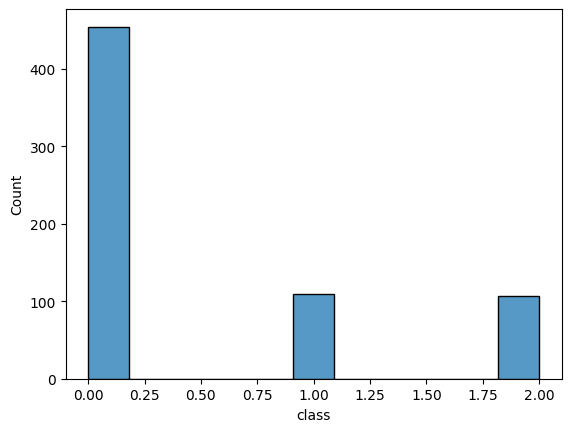

In [57]:
sns.histplot(y_train)

<Axes: ylabel='Count'>

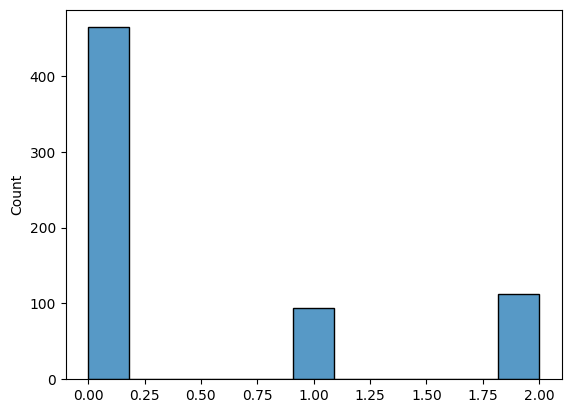

In [45]:
sns.histplot(pd.Series(y_pred_prob))

In [24]:
cross_val_score(cb, X_train, y_train, cv=3, scoring="roc_auc_ovr")
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

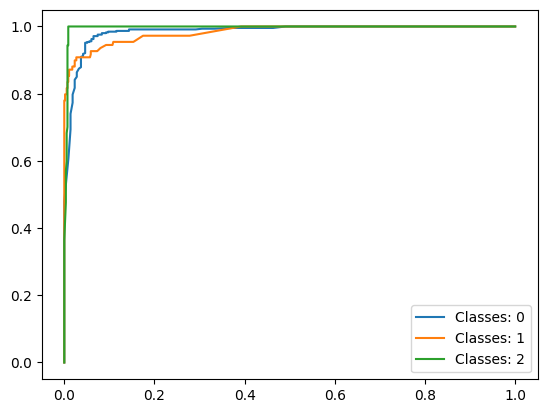

In [25]:
for i in range(n):
        
        fpr, tpr, _ = roc_curve(y_train == i, y_pred_prob[:, i]) 
        roc_auc = auc(fpr, tpr)
        
        fpr_dict[i] = fpr
        tpr_dict[i] = tpr
        roc_auc_dict[i] = roc_auc
        plt.plot(fpr, tpr, label=f'Classes: {i}')
        plt.legend()